
# McClellan Oscillator and McClellan Summation Index

In [14]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# load adv & dec data from CSV
adv = pd.read_csv('data/URC-NYSE_ADV.csv', parse_dates=['Date'], index_col=['Date'])
adv.rename(columns={'Numbers of Stocks':'Adv'}, inplace=True)
dec = pd.read_csv('data/URC-NYSE_DEC.csv', parse_dates=['Date'], index_col=['Date'])
dec.rename(columns={'Numbers of Stocks':'Dec'}, inplace=True)

In [15]:
# combine the data frames and sort (ascending)
df = pd.concat([adv, dec['Dec']],axis=1)
df = df.sort_index()

# calculate (Adjusted) Net Advances and the EMAs
df['ANA'] = ( df['Adv'] - df['Dec'] ) / ( df['Adv'] + df['Dec'] )

df['EMA 19'] = df['ANA'].ewm(span=19, min_periods=0, adjust=False, ignore_na=False).mean()
df['EMA 39'] = df['ANA'].ewm(span=39, min_periods=0, adjust=False, ignore_na=False).mean()

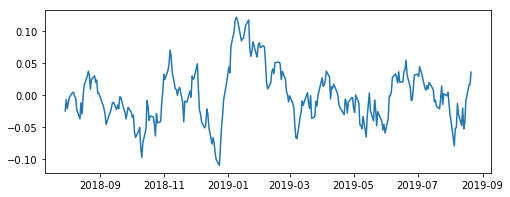

In [16]:
# McClellen Oscillator = difference between EMAs
df['MCO'] = df['EMA 19'] - df['EMA 39']

# chart it - past year-ish
plt.figure(figsize=(8,3)) 
plt.plot(df['MCO'].tail(270))
plt.show()

In [17]:
# peep the data frame
df

Adv     Dec       ANA    EMA 19    EMA 39       MCO
Date                                                              
1965-03-01   550.0   561.0 -0.009901 -0.009901 -0.009901  0.000000
1965-03-02   590.0   520.0  0.063063 -0.002605 -0.006253  0.003648
1965-03-03   574.0   528.0  0.041742  0.001830 -0.003853  0.005683
1965-03-04   490.0   594.0 -0.095941 -0.007947 -0.008457  0.000510
1965-03-05   446.0   646.0 -0.183150 -0.025467 -0.017192 -0.008275
1965-03-08   626.0   466.0  0.146520 -0.008269 -0.009006  0.000738
1965-03-09   501.0   609.0 -0.097297 -0.017171 -0.013421 -0.003750
1965-03-10   532.0   554.0 -0.020258 -0.017480 -0.013763 -0.003717
1965-03-11   614.0   452.0  0.151970 -0.000535 -0.005476  0.004941
1965-03-12   640.0   477.0  0.145927  0.014111  0.002094  0.012017
1965-03-15   578.0   535.0  0.038634  0.016563  0.003921  0.012642
1965-03-16   536.0   574.0 -0.034234  0.011484  0.002013  0.009470
1965-03-17   485.0   599.0 -0.105166 -0.000181 -0.003346  0.003164
1965-03-18   457.0   624.0 -0.154487 -0.015612 -0.010903 -0.004709
1965-03-19   474.0   602.0 -0.118959 -0.025947 -0.016306 -0.009641
1965-03-22   538.0   559.0 -0.019143 -0.025266 -0.016447 -0.008819
1965-03-23   534.0   537.0 -0.002801 -0.023020 -0.015765 -0.007255
1965-03-24   579.0   471.0  0.102857 -0.010432 -0.009834 -0.000598
1965-03-25   482.0   597.0 -0.106580 -0.020047 -0.014671 -0.005375
1965-03-26   278.0   828.0 -0.497288 -0.067771 -0.038802 -0.028969
1965-03-29   360.0   737.0 -0.343665 -0.095360 -0.054045 -0.041315
1965-03-30   574.0   482.0  0.087121 -0.077112 -0.046987 -0.030125
1965-03-31   602.0   473.0  0.120000 -0.057401 -0.038638 -0.018763
1965-04-01   551.0   507.0  0.041588 -0.047502 -0.034626 -0.012876
1965-04-02   684.0   421.0  0.238009 -0.018951 -0.020995  0.002044
1965-04-05   575.0   530.0  0.040724 -0.012983 -0.017909  0.004925
1965-04-06   499.0   591.0 -0.084404 -0.020125 -0.021233  0.001108
1965-04-07   557.0   488.0  0.066029 -0.011510 -0.016870  0.005360
1965-04-08   751.0   353.0  0.360507  0.025692  0.001999  0.023693
1965-04-09   742.0   378.0  0.325000  0.055623  0.018149  0.037474
...            ...     ...       ...       ...       ...       ...
2019-07-11  1470.0  1454.0  0.005472  0.095279  0.085787  0.009492
2019-07-12  1923.0  1007.0  0.312628  0.117013  0.097129  0.019885
2019-07-15  1419.0  1490.0 -0.024407  0.102871  0.091052  0.011819
2019-07-16  1514.0  1412.0  0.034860  0.096070  0.088243  0.007828
2019-07-17  1091.0  1836.0 -0.254527  0.061011  0.071104 -0.010093
2019-07-18  1624.0  1320.0  0.103261  0.065236  0.072712 -0.007476
2019-07-19  1259.0  1667.0 -0.139440  0.044768  0.062104 -0.017336
2019-07-22  1380.0  1538.0 -0.054147  0.034877  0.056292 -0.021415
2019-07-23  1966.0   973.0  0.337870  0.065176  0.070371 -0.005195
2019-07-24  2156.0   815.0  0.451363  0.103795  0.089420  0.014374
2019-07-25   794.0  2148.0 -0.460231  0.047392  0.061938 -0.014546
2019-07-26  2004.0   927.0  0.367451  0.079398  0.077213  0.002185
2019-07-29  1499.0  1447.0  0.017651  0.073223  0.074235 -0.001012
2019-07-30  1732.0  1206.0  0.179033  0.083804  0.079475  0.004329
2019-07-31  1076.0  1890.0 -0.274444  0.047980  0.061779 -0.013800
2019-08-01  1017.0  1958.0 -0.316303  0.011551  0.042875 -0.031324
2019-08-02  1149.0  1811.0 -0.223649 -0.011969  0.029549 -0.041518
2019-08-05   288.0  2724.0 -0.808765 -0.091648 -0.012367 -0.079282
2019-08-06  2054.0   923.0  0.379913 -0.044492  0.007247 -0.051739
2019-08-07  1360.0  1588.0 -0.077341 -0.047777  0.003018 -0.050795
2019-08-08  2463.0   513.0  0.655242  0.022525  0.035629 -0.013104
2019-08-09   982.0  1946.0 -0.329235 -0.012651  0.017386 -0.030037
2019-08-12   906.0  2039.0 -0.384720 -0.049858 -0.002719 -0.047139
2019-08-13  2135.0   827.0  0.441594 -0.000713  0.019496 -0.020209
2019-08-14   493.0  2516.0 -0.672316 -0.067873 -0.015094 -0.052779
2019-08-15  1567.0  1386.0  0.061294 -0.054957 -0.011275 -0.043682
2019-08-16  2344.0   622.0  0.580580  0.008597  0.018318 -0.00

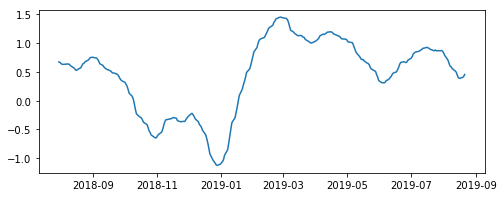

In [18]:
# The McClellan Summation Index

# initialise MCSI series & first value
df['MCSI'] = pd.Series()
df['MCSI'][0] = 0

# have to use a for, for this
for i in range(1, len(df)):
    # MCSI today = MCSI yesterday + MCO today
    df['MCSI'][i] = df['MCSI'][i-1] + df['MCO'][i]
    
# chart it
plt.figure(figsize=(8,3)) 
plt.plot(df['MCSI'].tail(270))
plt.show()

In [19]:
# check a date
df.loc['2019-01-09']

Adv       2008.000000
Dec        962.000000
ANA          0.352189
EMA 19       0.158571
EMA 39       0.036695
MCO          0.121877
MCSI        -0.613898
Name: 2019-01-09 00:00:00, dtype: float64

In [20]:
# check another date
df.loc['2019-02-26']

Adv       1213.000000
Dec       1724.000000
ANA         -0.173987
EMA 19       0.144385
EMA 39       0.138689
MCO          0.005696
MCSI         1.451673
Name: 2019-02-26 00:00:00, dtype: float64

In [21]:
# and some recent days
df.tail(20).head(10)

Adv     Dec       ANA    EMA 19    EMA 39       MCO      MCSI
Date                                                                        
2019-07-25   794.0  2148.0 -0.460231  0.047392  0.061938 -0.014546  0.866335
2019-07-26  2004.0   927.0  0.367451  0.079398  0.077213  0.002185  0.868520
2019-07-29  1499.0  1447.0  0.017651  0.073223  0.074235 -0.001012  0.867508
2019-07-30  1732.0  1206.0  0.179033  0.083804  0.079475  0.004329  0.871837
2019-07-31  1076.0  1890.0 -0.274444  0.047980  0.061779 -0.013800  0.858037
2019-08-01  1017.0  1958.0 -0.316303  0.011551  0.042875 -0.031324  0.826713
2019-08-02  1149.0  1811.0 -0.223649 -0.011969  0.029549 -0.041518  0.785196
2019-08-05   288.0  2724.0 -0.808765 -0.091648 -0.012367 -0.079282  0.705914
2019-08-06  2054.0   923.0  0.379913 -0.044492  0.007247 -0.051739  0.654175
2019-08-07  1360.0  1588.0 -0.077341 -0.047777  0.003018 -0.050795  0.603380